First, lets read the data into Colab space. The following syntax helps us to read the csv file.

In [1]:
df <- read.csv("http://bit.ly/w-data", header = TRUE)

Checking the contents of the csv file and the dimensions of the dataframe.

In [2]:
dim(df)
head(df)

[1] 25  2

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


Plotting the data:

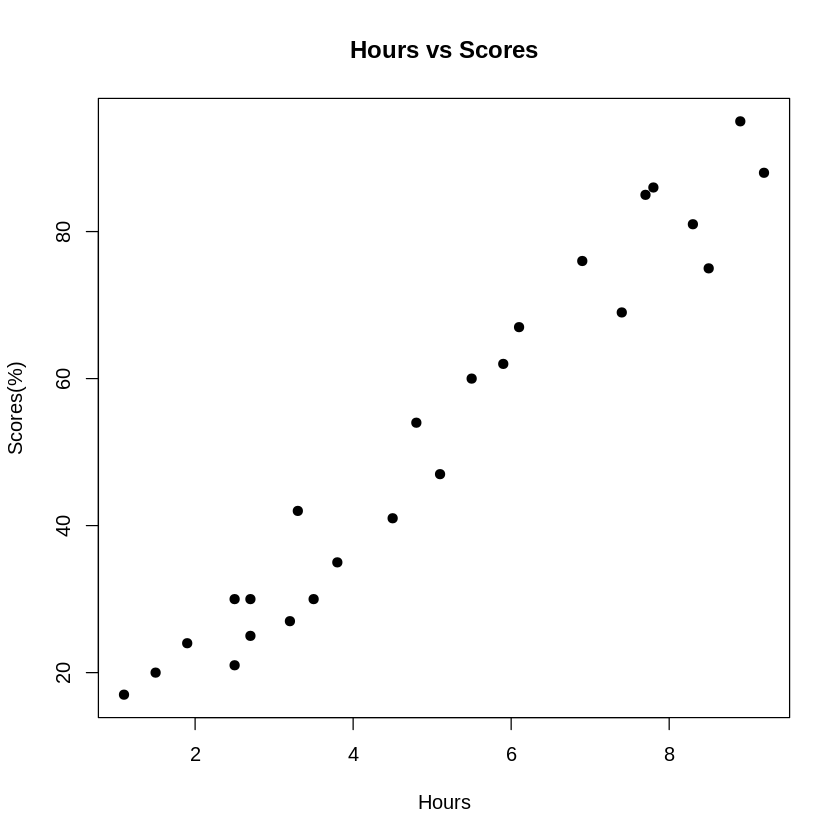

In [ ]:
plot(df$Hours, df$Scores, main = "Hours vs Scores", xlab = "Hours", ylab = "Scores(%)", pch = 19, frame = TRUE)

Preparing the data for training and testing.

In [ ]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingIndex <- sample(1:nrow(df), 0.7*nrow(df))  # row indices for training data
train <- df[trainingIndex, ]  # model training data
test  <- df[-trainingIndex, ]   # test data

Training the model with the Train dataset.

In [ ]:
df_train <- lm(Scores ~ Hours, data=train)

Lets plot the data along with linear regression.

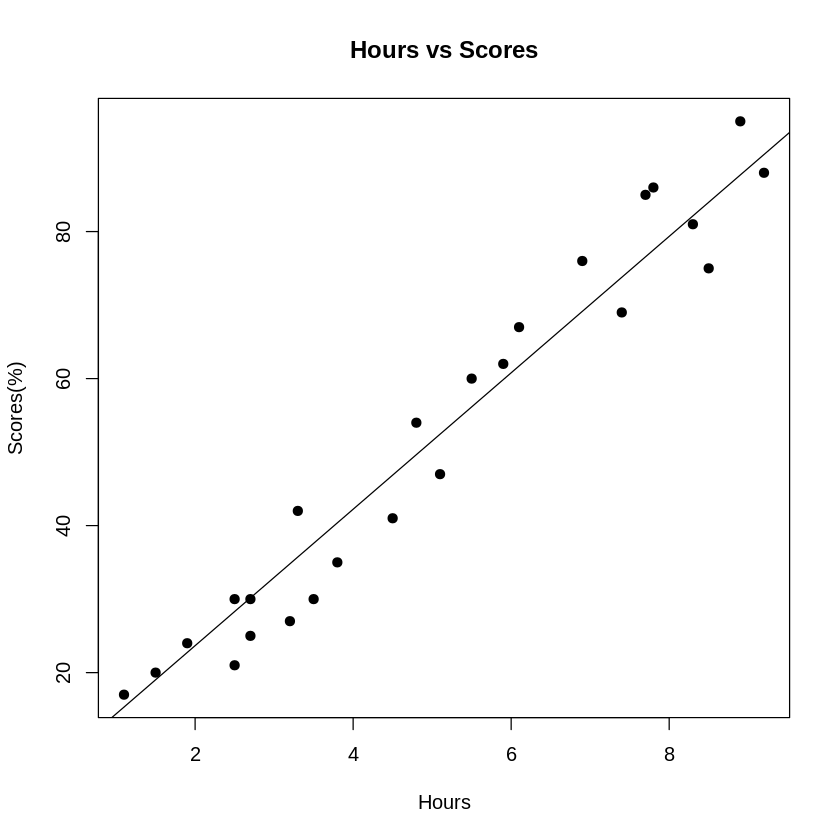

In [ ]:
plot(df$Hours, df$Scores, main = "Hours vs Scores",abline(df_train), xlab = "Hours", ylab = "Scores(%)", pch = 19, frame = TRUE)

Testing the model with Test dataset.

In [ ]:
test$Pred <- predict(df_train, test)

Checking the predictions of Test dataset.

In [ ]:
test

,Hours,Scores,Pred
,<dbl>,<int>,<dbl>
1,2.5,21,28.30797
3,3.2,27,34.80440
5,3.5,30,37.58859
9,8.3,81,82.13555
11,7.7,85,76.56718
15,1.1,17,15.31510
17,2.5,30,28.30797
25,7.8,86,77.49524


Predicting for a particular case.

In [ ]:
pred_score <- data.frame(Hours = c(9.25))
pred <- predict(df_train,pred_score)
pred

1 
90.95214

Summary of the model.

In [ ]:
summary(df_train)


Call:
lm(formula = Scores ~ Hours, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9917 -5.1641  0.9727  4.3466  7.2961 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1064     3.2030   1.594    0.132    
Hours         9.2806     0.5602  16.568 4.73e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.402 on 15 degrees of freedom
Multiple R-squared:  0.9482,	Adjusted R-squared:  0.9447 
F-statistic: 274.5 on 1 and 15 DF,  p-value: 4.735e-11
